In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.mechanics import dynamicsymbols, init_vprinting, msubs

init_printing()
init_vprinting()

m_c = Symbol('m_c')
m_p = Symbol('m_p')

x1, x2, x1_dot, x2_dot, theta1, theta2, theta1_dot, theta2_dot = symbols('x1 x2 x1dot x2dot theta1 theta2 theta1dot theta2dot', cls=Function)

g = Symbol('g')
l = Symbol('l')
t = Symbol('t')
f = Symbol('f')


eom_1 = Eq((m_p + m_c) * x2_dot(t) + m_p * l * cos(theta1(t)) - m_p * l * theta2_dot(t)**2 * sin(theta1(t)), f)
eom_2 = Eq(m_p * l * x2_dot(t) * cos(theta1(t)) + m_p * l**2 * theta2_dot(t) + m_p * g * l * sin(theta1(t)), 0)

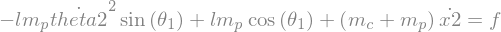

In [2]:
eom_1

In [3]:
eom_2

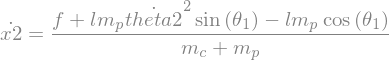

In [4]:
eom_1_x2_dot = dsolve(eom_1, x2_dot(t))
eom_1_x2_dot

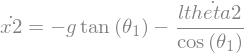

In [5]:
eom_2_x2_dot = dsolve(eom_2, x2_dot(t))
eom_2_x2_dot

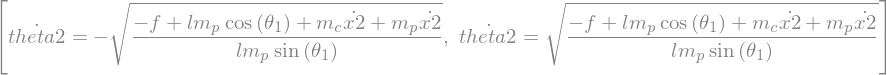

In [6]:
eom_1_theta2_dot = dsolve(eom_1, theta2_dot(t))
eom_1_theta2_dot

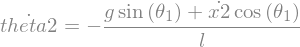

In [7]:
eom_2_theta2_dot = dsolve(eom_2, theta2_dot(t))
eom_2_theta2_dot

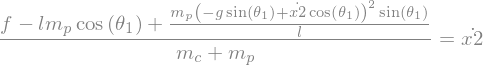

In [8]:
x2_dot_eom_1_subs = Eq((f + l * m_p * ((-g * sin(theta1(t)) + x2_dot(t)*cos(theta1(t))) / l)**2 * sin(theta1(t)) - l * m_p * cos(theta1(t)))/(m_c + m_p), x2_dot(t))
x2_dot_eom_1_subs

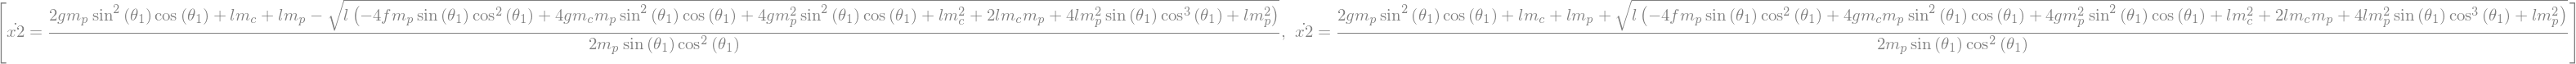

In [9]:
x2_dot_eom_1_subs_solved = dsolve(x2_dot_eom_1_subs, x2_dot(t))
x2_dot_eom_1_subs_solved

In [10]:
eom_1_x2_dot = dsolve(eom_1, x2_dot(t))
eom_1_theta2_dot = dsolve(eom_1, theta2_dot(t))
eom_2_x2_dot = dsolve(eom_2, x2_dot(t))
eom_2_theta2_dot = dsolve(eom_2, theta2_dot(t))

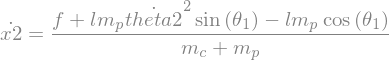

In [11]:
eom_1_x2_dot

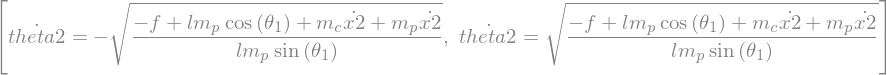

In [12]:
eom_1_theta2_dot

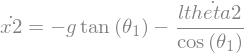

In [13]:
eom_2_x2_dot

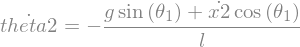

In [14]:
eom_2_theta2_dot

In [15]:
x_dot_dot, theta, theta_dot, theta_dot_dot = symbols('xdotdot theta thetadot thetadotdot', cls=Function)
eom_direct_1 = Eq((m_p + m_c) * x_dot_dot(t) + m_p * l * cos(theta(t)) * theta_dot_dot(t) - m_p * l * theta_dot(t)**2 * sin(theta(t)), f)
eom_direct_2 = Eq(m_p * l * x_dot_dot(t) * cos(theta(t)) + m_p * l**2 * theta_dot_dot(t) + m_p * g * l * sin(theta(t)), 0)

In [16]:
eom_direct_1

In [17]:
eom_direct_2

In [18]:
eq_x2_dot_dot_1 = dsolve(eom_direct_1, x_dot_dot(t))

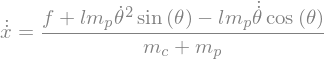

In [19]:
eq_x2_dot_dot_1

In [20]:
eq_x2_dot_dot_2 = dsolve(eom_direct_2, x_dot_dot(t))

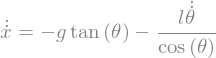

In [21]:
eq_x2_dot_dot_2

In [22]:
eq_theta2_dot_dot_2 = dsolve(eom_direct_2, theta_dot_dot(t))

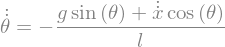

In [23]:
eq_theta2_dot_dot_2

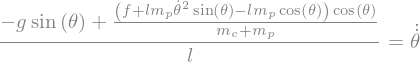

In [24]:
eq_theta_dot_dot = Eq((- g * sin(theta(t)) + ((f + l * m_p * theta_dot(t)**2 * sin(theta(t)) - l * m_p * cos(theta(t))) / (m_c + m_p)) * cos(theta(t))) / l, theta_dot_dot(t))
eq_theta_dot_dot

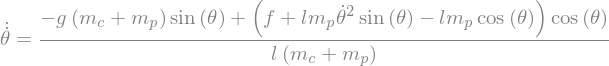

In [25]:
simplify(eq_theta_dot_dot)

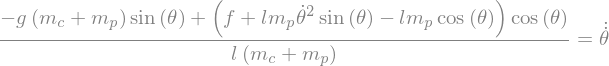

In [26]:
test = Eq((-g * (m_c + m_p) * sin(theta(t)) + (f + l * m_p * theta_dot(t)**2 * sin(theta(t)) - l * m_p * cos(theta(t))) * cos(theta(t))) / (l * (m_c + m_p)), theta_dot_dot(t))
test

Both here are the same, appling the following trig identity: sin(2 * a) / 2 = sin(a) * cos(a)


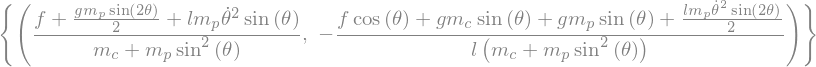

In [27]:
x_dot_dot, theta, theta_dot, theta_dot_dot = symbols('xdotdot theta thetadot thetadotdot', real=True)
print("Both here are the same, appling the following trig identity: sin(2 * a) / 2 = sin(a) * cos(a)")
nonlinsolve([(m_c + m_p) * x_dot_dot + m_p * l * theta_dot_dot * cos(theta) - m_p * l * theta_dot**2 * sin(theta) - f, m_p * l * cos(theta) * x_dot_dot + m_p * l**2 * theta_dot_dot + m_p  * g * l * sin(theta)], [x_dot_dot, theta_dot_dot])

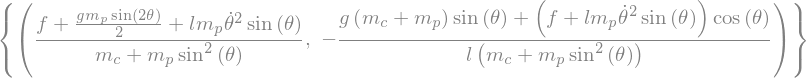

In [28]:
linsolve([(m_c + m_p) * x_dot_dot + m_p * l * theta_dot_dot * cos(theta) - m_p * l * theta_dot**2 * sin(theta) - f, m_p * l * cos(theta) * x_dot_dot + m_p * l**2 * theta_dot_dot + m_p  * g * l * sin(theta)], [x_dot_dot, theta_dot_dot])

In [29]:
print('Final equations of motion where m is pole mass and M is cart mass:')

from IPython.display import Image
from IPython.core.display import HTML 
Image(url = "https://cdn.discordapp.com/attachments/583293615678423060/659699880385708032/unknown.png")

Final equations of motion where m is pole mass and M is cart mass:


In [30]:
from IPython.display import Image
from IPython.core.display import HTML
print("This is the general form of linearizing the system.")
Image(url = "https://cdn.discordapp.com/attachments/583293615678423060/659739287390126111/unknown.png")

This is the general form of linearizing the system.


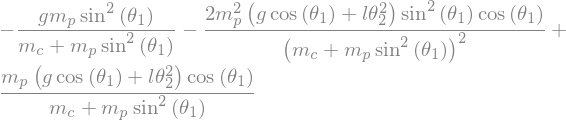

In [31]:
from sympy import *
theta1, theta2 = symbols('theta_1 theta_2')
diff((m_p * sin(theta1) * (g * cos(theta1) + l * theta2**2)) / (m_c + m_p * sin(theta1)**2), theta1)

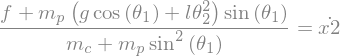

In [32]:
theta1, theta2, x2_dot = symbols('theta_1 theta_2 x2dot')
eq_diff_x2d = Eq((f + m_p * sin(theta1) * (g * cos(theta1) + l * theta2**2)) / (m_c + m_p * sin(theta1)**2), x2_dot)
eq_diff_x2d

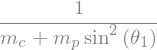

In [33]:
#Df2/Dq3
simplify(diff((f + m_p * sin(theta1) * (g * cos(theta1) + l * theta2**2)) / (m_c + m_p * sin(theta1)**2), f))

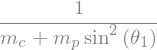

In [34]:
#Df2/Du1
df2_du1 = simplify(diff((f + m_p * sin(theta1) * (g * cos(theta1) + l * theta2**2)) / (m_c + m_p * sin(theta1)**2), f))
df2_du1

In [35]:
df2_du1_subs_1 = df2_du1.subs(sin(theta1), 0)
df2_du1_subs_1

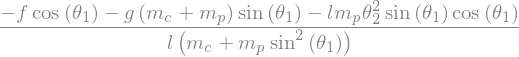

In [36]:
f4 = -(f * cos(theta1) + (m_c + m_p) * g * sin(theta1) + l * m_p * theta2**2 * sin(theta1) * cos(theta1)) / (l * (m_c + m_p * sin(theta1)**2))
f4

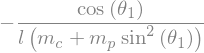

In [37]:
#Df4/Du1
df4_du1 = simplify(diff(f4, f))
df4_du1

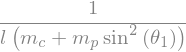

In [38]:
df4_du1_subs_1 = simplify(df4_du1.subs(cos(theta1), -1))
df4_du1_subs_1

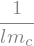

In [39]:
df4_du1_subs_2 = simplify(df4_du1_subs_1.subs(sin(theta1), 0))
df4_du1_subs_2

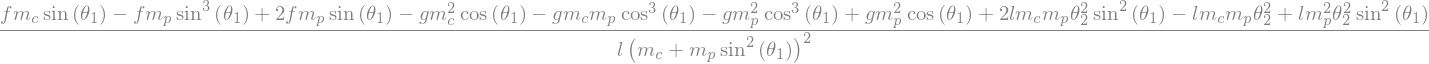

In [40]:
eq_diff_df4_dq3 = simplify(diff(f4, theta1))
eq_diff_df4_dq3

Firstly, we substitute in -1 for every cos(theta1) since we linearize around [x 0 pi 0] and cos(pi) is -1.


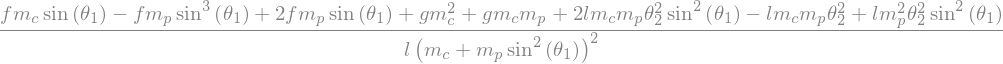

In [41]:
print('Firstly, we substitute in -1 for every cos(theta1) since we linearize around [x 0 pi 0] and cos(pi) is -1.')
eq_temp_simplify_1 = simplify(eq_diff_df4_dq3.subs(cos(theta1), -1))
eq_temp_simplify_1

Then we substitute 0 for every sin(theta1), again due to sin(pi) being 0.


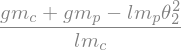

In [42]:
print('Then we substitute 0 for every sin(theta1), again due to sin(pi) being 0.')
eq_temp_simplify_2 = simplify(eq_temp_simplify_1.subs(sin(theta1), 0))
eq_temp_simplify_2

Lastly, the theta_2 terms are also 0 since theta_2 = 0


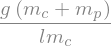

In [43]:
print('Lastly, the theta_2 terms are also 0 since theta_2 = 0')
eq_final_simplify = simplify(eq_temp_simplify_2.subs(theta2, 0))
eq_final_simplify

In [44]:
import numpy as np

g = 9.81
m_pole = 1
m_cart = 2
l = 0.51

A = np.array([[0, 1, 0, 0],
              [0, 0, (g * m_pole) / m_cart, 0],
              [0, 0, 0, 1],
              [0, 0, (g * (m_pole + m_cart)) / (l * m_cart), 0]])

B = np.array([[0],
              [1/m_cart],
              [0],
              [1/(l * m_cart)]])

print('A:\n', A)
print('--------------------------------------')
print('B:\n', B)

R = np.array([B, np.matmul(A,B), np.matmul(A**2, B), np.matmul(A**3, B)])
#print("Rank of R is", np.linalg.matrix_rank(R))
u, s, v = np.linalg.svd(R)
rank = np.sum(s > 1e-10)
print("\nRank of R is", rank)
eigenvalues, eigenvectors = np.linalg.eig(A)
print("--------------------------------")
print("Eigenvalues:\n", eigenvalues)

A:
 [[ 0.          1.          0.          0.        ]
 [ 0.          0.          4.905       0.        ]
 [ 0.          0.          0.          1.        ]
 [ 0.          0.         28.85294118  0.        ]]
--------------------------------------
B:
 [[0.        ]
 [0.5       ]
 [0.        ]
 [0.98039216]]

Rank of R is 4
--------------------------------
Eigenvalues:
 [ 0.          0.          5.37149338 -5.37149338]


In [90]:
def get_rank(matrix):
    u, s, v = np.linalg.svd(matrix)
    return np.sum(s > 1e-10)

In [45]:
def calc_x(A, t, n, exponent):
    x_t = np.identity(n)
    for i in range(1, exponent):
        x_t = x_t + (A**i * t**i) / math.factorial(i)
        
    return x_t

In [46]:
def calc_A_t(x):
    #x[0] = x
    #x[1] = x_dot
    #x[2] = theta
    #x[3] = theta_dot
    A_t = np.array([[0, 1, 0, 0],
              [0, 0, (m_pole * (g * m_cart * math.cos(2 * x[2]) + 0.5 * g * m_pole * math.cos(2 * x[2]) - 0.5 * g * m_pole + l * m_cart * x[3]**2 * math.cos(x[2]) - 0.25 * l * m_pole * x[3]**2 * math.cos(x[2]) + 0.25 * l * m_pole * x[3]**2 * math.cos(3 * x[2]))) / (m_cart + m_pole * math.sin(x[2])**2)**2, 0],
              [0, 0, 0, 1],
              [0, 0, (g * m_cart**2 * math.cos(x[2]) - g * m_cart * m_pole * math.cos(x[2])**3 - g * m_pole**2 * math.cos(x[2])**3 + g * m_pole**2 * math.cos(x[2]) + 2 * l * m_cart * m_pole * x[3]**2 * math.sin(x[2])**2 - l * m_cart * m_pole * x[3]**2 + l * m_pole**2 * x[3]**2 * math.sin(x[2])**2) / (l * (m_cart + m_pole * math.sin(x[2])**2)**2), 0]])
    
    return A_t

In [47]:
def calc_B_t(x):
    #x[0] = x
    #x[1] = x_dot
    #x[2] = theta
    #x[3] = theta_dot
    B_t = np.array([[0],
              [1/(m_cart + m_pole * math.sin(x[2])**2)],
              [0],
              [-math.cos(x[2]) / (l * (m_cart + m_pole * math.sin(x[2])**2))]])
    return B_t

In [48]:
import scipy.linalg

def calc_K_t(A, B, Q, R):
    
    X_t = scipy.linalg.solve_continuous_are(A, B, Q, R)
    K_t = np.matmul(np.matmul(scipy.linalg.inv(R), B.T), X)
    return K

In [49]:
def plot_states(t, x):

    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)
    ax3 = plt.subplot(2,2,3)
    ax4 = plt.subplot(2,2,4)

    ax1.plot(t, x[0])
    #plt.ylabel("x (Pos in m)")

    ax2.plot(t, x[1])
    #plt.ylabel("x_dot (Vel in m/s)")

    ax3.plot(t, x[2])
    #plt.ylabel("theta (Angle in rad)")

    ax4.plot(t, x[3])
    #plt.ylabel("Theta_dot (Angular vel in rad/s)")

In [50]:
def plot_solution(solution):

    ax1 = plt.subplot(2,2,1)
    ax2 = plt.subplot(2,2,2)
    ax3 = plt.subplot(2,2,3)
    ax4 = plt.subplot(2,2,4)

    ax1.plot(solution.t, solution.y[0])
    #plt.ylabel("x (Pos in m)")

    ax2.plot(solution.t, solution.y[1])
    #plt.ylabel("x_dot (Vel in m/s)")

    ax3.plot(solution.t, solution.y[2])
    #plt.ylabel("theta (Angle in rad)")

    ax4.plot(solution.t, solution.y[3])
    #plt.ylabel("Theta_dot (Angular vel in rad/s)")

In [51]:
def subtract_lists(x1, x2):
    x = []
    for i in range(len(x1)):
        x.append(x1[i]-x2[i])
        
    return x

In [52]:
#Serializing for visualization

import json
def export_json_data(solution, file_name):
    data = dict()

    for i in range(len(solution.t)):
        data[i] = [solution.y[0][i], 
                   solution.y[1][i], 
                   solution.y[2][i], 
                   solution.y[3][i]]

    with open("{0}.json".format(file_name), 'w') as outfile:
        json.dump(data, outfile)

In [53]:
dt = 0.001
length = 80

In [54]:
import math
from tqdm import tqdm
import matplotlib.pyplot as plt
#x(t) = e^(A*t) where e^(A*t) = I + A * t + (A^2+t^2)/2! + (A^3 + t^3)/3!

x_t = []

#IMPORTANT: afer linearizing around a point, this point is the new 0!
x0 = np.array([[0.3],
               [0.13],
               [math.pi],
               [3.2]])

for i in tqdm(range(0, int(length * (1/dt)))):
    t = i * dt
    x_t.append(np.matmul(calc_x(A, t, 4, 30), x0))

100%|██████████| 80000/80000 [00:11<00:00, 7196.85it/s]


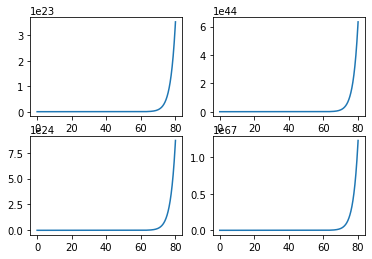

In [55]:
x = []
xd = []
theta = []
thetad = []

for i in range(len(x_t)):
    x.append(x_t[i][0])
    xd.append(x_t[i][1])
    theta.append(x_t[i][2])
    thetad.append(x_t[i][3])


plot_states(np.arange(0, length, dt), [x, xd, theta, thetad])

100%|██████████| 80000/80000 [00:01<00:00, 49280.85it/s]


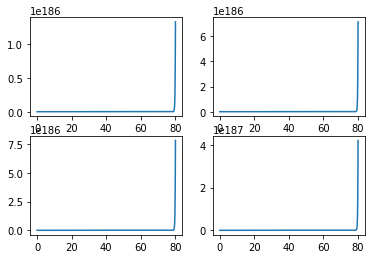

In [56]:
#Basically implementing: https://www.youtube.com/watch?v=nyqJJdhReiA&list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m&index=2

T = eigenvectors
D = np.array([[eigenvalues[0], 0, 0, 0],
              [0, eigenvalues[1], 0, 0],
              [0, 0, eigenvalues[2], 0],
              [0, 0, 0, eigenvalues[3]]])

x_t = []

for t in tqdm(np.arange(0, length, dt)):
    e_Dt = np.array([[math.e**(eigenvalues[0] * t), 0, 0, 0],
                 [0, math.e**(eigenvalues[1] * t), 0, 0],
                 [0, 0, math.e**(eigenvalues[2] * t), 0],
                 [0, 0, 0, math.e**(eigenvalues[3] * t)]])
    e_At = np.matmul(np.matmul(T, e_Dt), np.linalg.inv(T))
    x_t.append(np.matmul(e_At, x0))

x = []
xd = []
theta = []
thetad = []

for i in range(len(x_t)):
    x.append(x_t[i][0])
    xd.append(x_t[i][1])
    theta.append(x_t[i][2])
    thetad.append(x_t[i][3])

plot_states(np.arange(0, length, dt), [x, xd, theta, thetad])

In [57]:
Q = np.matrix('2 0 0 0; 0 1 0 0; 0 0 10 0; 0 0 0 1')
R = np.matrix('0.1')
print("Q:\n", Q)
print("-----------------")
print("R:\n", R)

Q:
 [[ 2  0  0  0]
 [ 0  1  0  0]
 [ 0  0 10  0]
 [ 0  0  0  1]]
-----------------
R:
 [[0.1]]


In [58]:
test_length = 20
test_dt = 1/120

timespan = [0, test_length]
test_t_eval = np.arange(0, test_length, test_dt)
print(len(test_t_eval))

2400


K:

[[-4.47213595 -7.93037482 87.44022063 17.69462815]]
--------------------------------------------------------------------
A-BK eigenvalues:
 [-7.03021138+0.j         -4.40059047+0.j         -0.9758427 +0.66182939j
 -0.9758427 -0.66182939j]


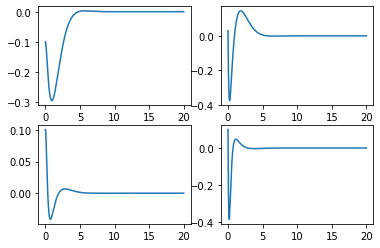

In [59]:
import scipy.integrate
from scipy.special import gamma, airy
import scipy.linalg

#This section calculates the optimal K matrix to drive the system to a given state

X = scipy.linalg.solve_continuous_are(A, B, Q, R)
K = np.matmul(np.matmul(scipy.linalg.inv(R), B.T), X)
print('K:\n')
print(K)
x0 = [-0.1, 0.03, 0.1, 0.1]

def func(t, x):
    return np.matmul(A-np.matmul(B,K), x)

solution = scipy.integrate.solve_ivp(func, timespan, x0, t_eval=test_t_eval)
plot_solution(solution)
#print(A-np.matmul(B,K))
eigenvalues, eigenvectors = np.linalg.eig(A-np.matmul(B, K))
print("--------------------------------------------------------------------")
print("A-BK eigenvalues:\n", eigenvalues)

2400 Data points were calculated.


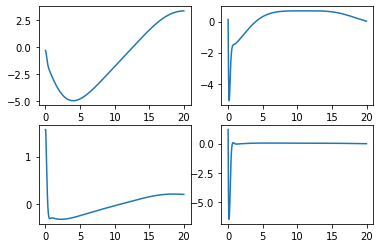

In [60]:
#Linearizing around current position/changing point

import scipy.integrate
from scipy.special import gamma, airy
import math

x0 = [-0.3, 0.13, math.pi / 2, 1.2]

K_theta_map = dict()

def func(t, x):
    A_t = calc_A_t(x)
    K_t = calc_K_t(A, B, Q, R)
    B_t = calc_B_t(x)
    K_theta_map[x[2]] = K_t
    
    return np.matmul(A_t-np.matmul(B,K_t), x)

solution = scipy.integrate.solve_ivp(func, timespan, x0, t_eval=test_t_eval)
plot_solution(solution)
print(len(solution.t), "Data points were calculated.")
export_json_data(solution, "data_zero")

In [61]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url = "https://cdn.discordapp.com/attachments/273117638308134912/661514994076090370/unknown.png")

In [112]:
#LQI Init
A_e = np.array([[0, 1, 0, 0, 0, 0, 0],
              [0, 0, (g * m_pole) / m_cart, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 0],
              [0, 0, (g * (m_pole + m_cart)) / (l * m_cart), 0, 0, 0, 0],
              [-1, 0, 0, 0, 0, 0, 0],
              [0, -1, 0, 0, 0, 0, 0],
              [0, 0, -1, 0, 0, 0, 0]])

B_e = np.array([[0],
              [1/m_cart],
              [0],
              [1/(l * m_cart)],
              [0],
              [0],
              [0]])

C = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0]])

Q_e = np.array([[1, 0, 0, 0, 0, 0, 0],
                [0, 10, 0, 0, 0, 0, 0],
                [0, 0, 100, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 10, 0],
                [0, 0, 0, 0, 0, 0, 10]])

R_e = np.matrix('0.001')

print("Q_e:\n", Q_e)
print("------------------------------------------------------------------")
print("R_e:\n", R_e)

print("A_e:\n", A_e)
print("------------------------------------------------------------------")
print("B_e:\n", B_e)

ctrb_matrix = np.array([B_e, np.matmul(A_e,B_e), np.matmul(A_e**2, B_e), np.matmul(A_e**3, B_e), np.matmul(A_e**4, B_e), np.matmul(A_e**5, B_e), np.matmul(A_e**6, B_e), np.matmul(A_e**7, B_e)])

print("Rank of extended system is:", get_rank(ctrb_matrix))

X_e = scipy.linalg.solve_continuous_are(A_e, B_e, Q_e, R_e)
K_e = np.matmul(np.matmul(scipy.linalg.inv(R_e), B_e.T), X_e)

print('\nK_e:\n', K_e)

x_e0 = [-0.3, 0.13, 2.9, 1.2, 0]

r_t = dict()

x_ref = 5
xd_ref = 0
theta_ref = 0
thetad_ref = 0

for t in np.arange(0, test_length, test_dt):
    if t > test_length * 0.5:
        value = x_ref * 0.25
    else:
        value = x_ref
    r_t[round(t, 1)] = np.array([value])
    

Q_e:
 [[  1   0   0   0   0   0   0]
 [  0  10   0   0   0   0   0]
 [  0   0 100   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0  10   0]
 [  0   0   0   0   0   0  10]]
------------------------------------------------------------------
R_e:
 [[0.001]]
A_e:
 [[ 0.          1.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          4.905       0.          0.          0.
   0.        ]
 [ 0.          0.          0.          1.          0.          0.
   0.        ]
 [ 0.          0.         28.85294118  0.          0.          0.
   0.        ]
 [-1.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.         -1.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.         -1.          0.          0.          0.
   0.        ]]
------------------------------------------------------------------
B_e:
 [[0.        ]
 [0.5       ]
 [0.        ]
 [0.

In [86]:
x_i_error = 0.0

def traj_func(t, x_e):
    return np.matmul(A_e - np.matmul(B_e, K_e), x_e) + np.array([0, 0, 0, 0, 1]) * r_t[round(t, 0)]

traj_solution = scipy.integrate.solve_ivp(traj_func, timespan, x_e0, t_eval=test_t_eval)
plot_solution(traj_solution)

print("REMEMBER TO CALCULATE THE K MATRIX IF ANY MATRIX ADJUSTMENTS WERE MADE!\n")
print(len(traj_solution.t), "Data points were calculated.")
print('----------------------------------------------------------')
print("Final x:", traj_solution.y[0][-1])
print("Final x_dot:", traj_solution.y[1][-1])
print("Final theta:", traj_solution.y[2][-1])
print("Final theta dot:", traj_solution.y[3][-1])

export_json_data(traj_solution, "trajectory_test1")

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 7)

This is K rn:
 [[-4.47213595 -7.93037482 87.44022063 17.69462815]]
Solving...
2400


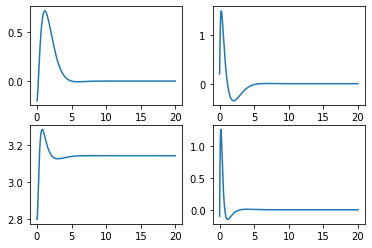

In [64]:
import scipy.integrate
from scipy.special import gamma, airy
import math

#THESE HAVE TO BE IN NONLINEAR COORDINATES, so close to pi
x0 =  [-0.2, 0.2, 2.8, -0.1]
linearization_array = np.array([0, 0, math.pi, 0])

print("This is K rn:\n", K)

forces = []

def func_nonlinear(t, x):
    f = -np.matmul(K, np.subtract(np.array(x), linearization_array))
    forces.append(f)
    return [x[1],
            (f + m_pole * math.sin(x[2]) * (l * x[3]**2 + g * math.cos(x[2]))) / (m_cart + m_pole * sin(x[2])**2),
            x[3],
            (-f * math.cos(x[2]) - m_pole * l * x[3]**2 * math.cos(x[2]) * math.sin(x[2]) - (m_cart + m_pole) * g * math.sin(x[2])) / (l * (m_cart + m_pole * sin(x[2])**2))]

print("Solving...")
solution_nonlinear = scipy.integrate.solve_ivp(func_nonlinear, timespan, x0, t_eval=test_t_eval)
#solution_nonlinear = scipy.integrate.solve_iqvp(func_nonlinear, timespan, x0)
print(len(solution_nonlinear.t))
plot_solution(solution_nonlinear)
export_json_data(solution_nonlinear, "nonlinear_test.json")

[32.33004758]


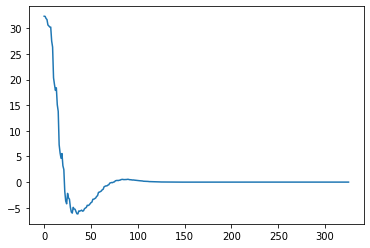

In [73]:
plt.plot(range(len(forces)), forces)
print(max(forces))

This is K_e:
 [[-9.53462358e+00 -1.57134803e+02  7.11645602e+02  1.42937149e+02
  -1.43539864e-14  9.53462605e+01 -3.05175781e-05]]
Solving...
2400


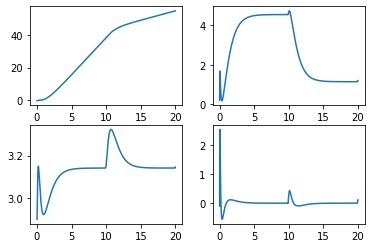

In [114]:
import scipy.integrate
from scipy.special import gamma, airy
import math

#This section attempts to simulate LQI

#THESE HAVE TO BE IN NONLINEAR COORDINATES
x_e0 =  [-0.2, 0.2, 2.9, -0.1]
linearization_array_e = np.array([0, 0, math.pi, 0, 0, 0, 0])

print("This is K_e:\n", K_e)

forces_lqi = []

x_i_error_1 = 0.0
x_i_error_2 = 0.0
x_i_error_3 = 0.0
prev_t = 0.0

for i in np.arange(0, test_length, test_dt):
    r_t[round(t, 1)] = np.array([0, 0, 0.1])
    
C = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0]])

def func_nonlinear_lqi(t, x):
    global x_i_error_1
    global x_i_error_2
    global x_i_error_3
    global prev_t
    
    error_vector = (-np.matmul(C, x) + r_t[round(t, 1)]) * (t - prev_t)
    
    x_i_error_1 += error_vector[0]
    x_i_error_2 += error_vector[1]
    x_i_error_3 += error_vector[2]
    
    prev_t = t
    
    x_e = np.array([x[0], x[1], x[2], x[3], x_i_error_1, x_i_error_2, x_i_error_3])
    
    f = -np.matmul(K_e, np.subtract(np.array(x_e), linearization_array_e))
    
    forces_lqi.append(f)
    
    return [x[1],
            (f + m_pole * math.sin(x[2]) * (l * x[3]**2 + g * math.cos(x[2]))) / (m_cart + m_pole * sin(x[2])**2),
            x[3],
            (-f * math.cos(x[2]) - m_pole * l * x[3]**2 * math.cos(x[2]) * math.sin(x[2]) - (m_cart + m_pole) * g * math.sin(x[2])) / (l * (m_cart + m_pole * sin(x[2])**2))]

print("Solving...")
solution_nonlinear_lqi = scipy.integrate.solve_ivp(func_nonlinear_lqi, timespan, x_e0, t_eval=test_t_eval)
#solution_nonlinear_lqi = scipy.integrate.solve_ivp(func_nonlinear_lqi, timespan, x_e0)
print(len(solution_nonlinear_lqi.t))
plot_solution(solution_nonlinear_lqi)

[38.91957096]


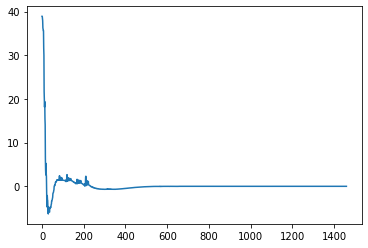

In [67]:
plt.plot(range(len(forces_lqi)), forces_lqi)
print(max(forces_lqi))

In [68]:
test = np.array(x0)
print(test)

[-0.2  0.2  2.8 -0.1]


In [127]:
#Kalman filter section
#https://youtu.be/MZJMi-6_4UU?list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m

C = np.array([1, 0, 0, 0])
C_T = np.array([[1],
                [0],
                [0],
                [0]])

curly_O = np.array([[C],
                    [np.matmul(C, A)],
                    [np.matmul(C, A**2)],
                    [np.matmul(C, A**3)]])
print("Rank of observability matrix:", get_rank(curly_O))

V_d = np.array([[0.1, 0, 0, 0],
                [0, 0.1, 0, 0],
                [0, 0, 0.1, 0],
                [0, 0, 0, 0.1]])
V_n = 1

#V_n = np.eye(4)
print(A.T.shape)
print(C_T.shape)

X_kalman = scipy.linalg.solve_continuous_are(A.T, C_T, V_d, V_n)
K_f = (np.matmul(np.matmul(scipy.linalg.inv(V_n, C_T), X_kalman)).T
#K = np.matmul(np.matmul(scipy.linalg.inv(R), B.T), X)

Rank of observability matrix: 4
(4, 4)
(4, 1)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 1)

In [128]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url = "https://miro.medium.com/max/4365/1*TMZEwugeC5wlHdITbdmQ5A.png")